# Leah Prince

## Overview

This dataset was pulled from Kaggle.

A nationwide survey of hospital costs conducted by the US Agency for Healthcare consists of hospital records of inpatient samples. The given data is restricted to the city of Wisconsin and relates to patients in the age group 0-17 years. The agency wants to analyze the data to research on the healthcare costs and their utilization.

Here is a detailed description of the given dataset:
- AGE : Age of the patient discharged
- FEMALE : Binary variable that indicates if the patient is female
- LOS : Length of stay, in days
- RACE : Race of the patient (specified numerically)
- TOTCHG : Hospital discharge costs
- APRDRG : All Patient Refined Diagnosis Related Groups

Objectives:
- Find the category of people who frequently visit the hospital and who has the maximum expenditure, by diagnosis.
- Understand charges of each diagnosis treatment and the most expensive treatment.
- Understand charges by age and gender.
- Understand if the race of a patient is related to hospitalization costs to understand risks of malpractice.
- Determine the best variable(s) for predicting hospital costs.

## OLS Model Assumptions

- Data is normally distributed
- Little to no multicollinearity
- Linear relationship between X and Y
- Homoscedasticity (equal variance of residuals for X)
- No missing values or missing at random

## Import Libraries and Files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.formula.api as smf
import statsmodels.tools.eval_measures as smf_metrics
import statsmodels.api as sm

In [2]:
df = pd.read_csv('HospitalCosts.csv')
df.head()

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
0,17,1,2,1.0,2660,560
1,17,0,2,1.0,1689,753
2,17,1,7,1.0,20060,930
3,17,1,1,1.0,736,758
4,17,1,1,1.0,1194,754


## Data Exploration

### Determine Missing Values

In [3]:
df.isnull().sum()

AGE       0
FEMALE    0
LOS       0
RACE      1
TOTCHG    0
APRDRG    0
dtype: int64

In [4]:
df['RACE'].unique()

array([ 1.,  4.,  6.,  2.,  5., nan,  3.])

In [5]:
df['RACE'] = df['RACE'].replace(np.nan,0)

Race was the only category missing values. Therefore, I created a category to capture missing values, which is 0.

In [6]:
df.isnull().sum()

AGE       0
FEMALE    0
LOS       0
RACE      0
TOTCHG    0
APRDRG    0
dtype: int64

In [7]:
df.head()

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
0,17,1,2,1.0,2660,560
1,17,0,2,1.0,1689,753
2,17,1,7,1.0,20060,930
3,17,1,1,1.0,736,758
4,17,1,1,1.0,1194,754


### Explore Data

In [8]:
df.shape

(500, 6)

There are 500 rows and 6 colums.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     500 non-null    int64  
 1   FEMALE  500 non-null    int64  
 2   LOS     500 non-null    int64  
 3   RACE    500 non-null    float64
 4   TOTCHG  500 non-null    int64  
 5   APRDRG  500 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 23.6 KB


All variables are numeric.

In [10]:
df.columns

Index(['AGE', 'FEMALE', 'LOS', 'RACE', 'TOTCHG', 'APRDRG'], dtype='object')

#### Race

In [11]:
df['RACE'].value_counts()

1.0    484
2.0      6
5.0      3
4.0      3
6.0      2
3.0      1
0.0      1
Name: RACE, dtype: int64

In [12]:
df.groupby('RACE')['TOTCHG'].mean().round(2)

RACE
0.0    1156.00
1.0    2772.67
2.0    4202.17
3.0    3041.00
4.0    2344.67
5.0    2026.67
6.0    1349.00
Name: TOTCHG, dtype: float64

People of race 1, accounted for the most number of patients.

Patients of race two and three incurred the highest charges, amongst all other races.

#### Age

In [13]:
df['AGE'].describe()

count    500.000000
mean       5.086000
std        6.949474
min        0.000000
25%        0.000000
50%        0.000000
75%       13.000000
max       17.000000
Name: AGE, dtype: float64

Patient ages range between 0 and 17, with an average age of 5.

In [14]:
df.AGE.value_counts()

0     307
17     38
15     29
16     29
14     25
13     18
12     15
1      10
11      8
10      4
7       3
3       3
9       2
6       2
5       2
4       2
8       2
2       1
Name: AGE, dtype: int64

In [15]:
df.groupby('AGE')['TOTCHG'].mean()

AGE
0      2208.853420
1      3774.400000
2      7298.000000
3     10183.333333
4      7996.000000
5      9253.500000
6      8964.000000
7      3362.333333
8      2370.500000
9     10573.500000
10     6117.250000
11     1781.250000
12     3660.800000
13     1729.722222
14     2585.720000
15     3853.344828
16     2384.448276
17     4599.394737
Name: TOTCHG, dtype: float64

Patients less than 1 year of age accounted for the most number of patients. However, patients who were ages 3 and 9 incurred the highest charges.

#### Female

In [16]:
df['FEMALE'].value_counts()

1    256
0    244
Name: FEMALE, dtype: int64

In [17]:
df.groupby('FEMALE')['TOTCHG'].mean()

FEMALE
0    3013.897541
1    2546.105469
Name: TOTCHG, dtype: float64

Females accounted for the highest number of patients. However, males accounted for the highest in total charges.

In [18]:
pd.crosstab(df['RACE'], df['FEMALE'])

FEMALE,0,1
RACE,,
0.0,0,1
1.0,235,249
2.0,4,2
3.0,0,1
4.0,1,2
5.0,3,0
6.0,1,1


Females of race 1 accounted for the highest number of patients.

In [19]:
pd.crosstab(df['AGE'], df['FEMALE'])

FEMALE,0,1
AGE,,
0,170,137
1,8,2
2,1,0
3,2,1
4,1,1
5,1,1
6,2,0
7,3,0
8,2,0


Males less than 1 year of age, accounted for the highest number of patients.

#### APRDRG

In [20]:
df['APRDRG'].unique()

array([560, 753, 930, 758, 754, 347, 751, 812, 566, 249, 422,  50, 139,
       141, 420,  97, 811, 755, 720,  53, 760, 710, 776, 115, 602, 138,
       137, 640, 639, 143, 254, 581, 633, 626, 636,  23,  57, 421, 580,
       750,  49,  51, 313, 614, 634, 952,  21,  92, 756, 317, 344, 114,
       206, 723, 911,  54, 225,  58, 740, 308, 204, 561, 863], dtype=int64)

In [21]:
df.sort_values('TOTCHG', axis=0, ascending=False, inplace=True)

In [22]:
df[['APRDRG', 'TOTCHG']].head()

,APRDRG,TOTCHG
332,911,48388
71,602,29188
168,421,26356
244,49,20195
2,930,20060


APRDRG 911 had the most charges, at 48,388.

In [23]:
df.sort_values('TOTCHG', axis=0, ascending=True, inplace=True)

In [24]:
df[['APRDRG', 'TOTCHG']].head()

,APRDRG,TOTCHG
8,753,532
388,755,532
365,754,547
378,751,548
403,640,550


APRDRG 755 and 753 had the least number of charges at 532.

#### TOTCHG

In [25]:
df['TOTCHG'].describe()

count      500.000000
mean      2774.388000
std       3888.407367
min        532.000000
25%       1216.250000
50%       1536.500000
75%       2530.250000
max      48388.000000
Name: TOTCHG, dtype: float64

#### All Variables

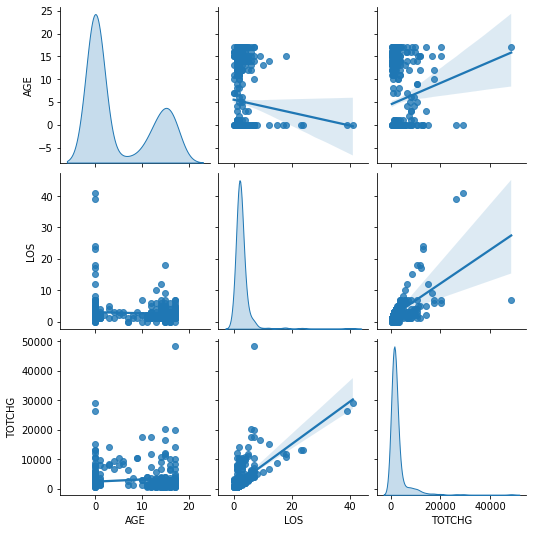

In [26]:
sns.pairplot(df, vars = ['AGE', 'LOS', 'TOTCHG'], palette = 'Dark2', kind='reg', diag_kind='kde')
plt.show()

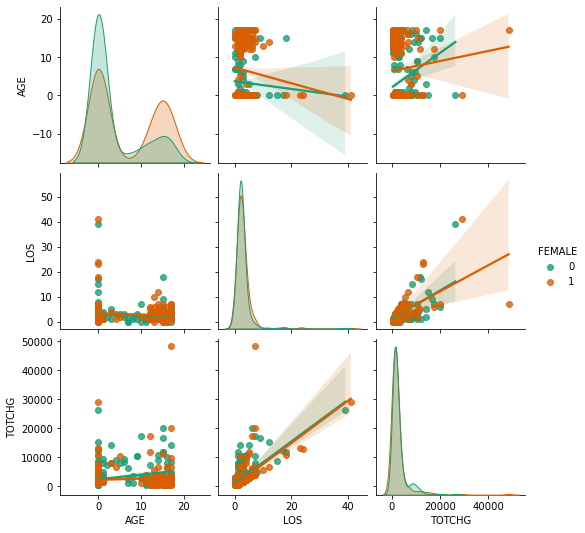

In [27]:
sns.pairplot(df,vars = ['AGE', 'LOS', 'TOTCHG'], hue='FEMALE', palette = 'Dark2', kind='reg', diag_kind='kde')
plt.show()

There are not any visible strong correlations in the data. Also, the distribution for each variable does not follow a normal distribution, which violates one of the model assumptions.

## Check for Multicollinearity

             AGE    FEMALE       LOS      RACE    TOTCHG    APRDRG
AGE     1.000000  0.233979 -0.068640  0.018834  0.131680  0.147497
FEMALE  0.233979  1.000000  0.035761 -0.042309 -0.060195  0.252863
LOS    -0.068640  0.035761  1.000000 -0.016686  0.623193  0.005059
RACE    0.018834 -0.042309 -0.016686  1.000000 -0.016341 -0.044100
TOTCHG  0.131680 -0.060195  0.623193 -0.016341  1.000000 -0.330001
APRDRG  0.147497  0.252863  0.005059 -0.044100 -0.330001  1.000000
AxesSubplot(0.125,0.125;0.62x0.755)


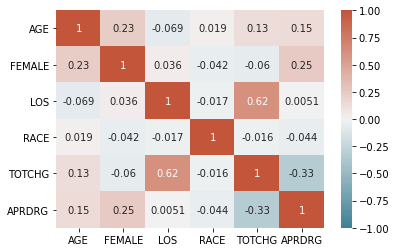

In [28]:
cmap = sns.diverging_palette(220, 20, as_cmap=True)


correlations = df.corr()

print(correlations)
print (sns.heatmap(correlations,  vmin=-1, vmax=1, cmap=cmap,  annot=True ))

There is no multicollinearity found between the independent variables.

## Create OLS Model

In [29]:
lm = smf.ols(formula='TOTCHG ~ LOS', data=df)

ols_res= lm.fit()

ols_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TOTCHG   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     316.2
Date:                Fri, 25 Jun 2021   Prob (F-statistic):           3.92e-55
Time:                        09:21:38   Log-Likelihood:                -4718.9
No. Observations:                 500   AIC:                             9442.
Df Residuals:                     498   BIC:                             9450.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    736.9518    177.933      4.142      0.000     387.361    1086.543
LOS          720.4513     40.515     17.782      0.000     640.851     800.052
==============================================================================
Omnibus:                      692.811   Durbin-Watson:                   0.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           137486.082
Skew:                           7.047   Prob(JB):                         0.00
Kurtosis:                      83.004   Cond. No.                         5.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-Squared value of 0.388 indicates that LOS may not be the best variable to use in predicting hospital charges. Therefore, additional variables will be added to the model.

In [30]:
lm = smf.ols(formula='TOTCHG ~ LOS + AGE', data=df)

ols_res= lm.fit()

ols_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TOTCHG   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     179.2
Date:                Fri, 25 Jun 2021   Prob (F-statistic):           2.55e-59
Time:                        09:21:38   Log-Likelihood:                -4706.1
No. Observations:                 500   AIC:                             9418.
Df Residuals:                     497   BIC:                             9431.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    198.8113    203.002      0.979      0.328    -200.036     597.659
LOS          734.3602     39.622     18.534      0.000     656.513     812.208
AGE           98.0743     19.177      5.114      0.000      60.397     135.752
==============================================================================
Omnibus:                      678.829   Durbin-Watson:                   0.871
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           130949.572
Skew:                           6.781   Prob(JB):                         0.00
Kurtosis:                      81.113   Cond. No.                         13.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
lm = smf.ols(formula='TOTCHG ~ LOS + AGE + C(FEMALE)', data=df)

ols_res= lm.fit()

ols_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TOTCHG   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     127.4
Date:                Fri, 25 Jun 2021   Prob (F-statistic):           3.41e-61
Time:                        09:21:38   Log-Likelihood:                -4699.0
No. Observations:                 500   AIC:                             9406.
Df Residuals:                     496   BIC:                             9423.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        610.6805    228.013      2.678      0.008     162.690    1058.671
C(FEMALE)[T.1] -1021.7377    270.103     -3.783      0.000   -1552.425    -491.051
LOS              742.2741     39.158     18.956      0.000     665.338     819.210
AGE              115.5497     19.481      5.931      0.000      77.275     153.825
==============================================================================
Omnibus:                      694.817   Durbin-Watson:                   0.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           152230.933
Skew:                           7.036   Prob(JB):                         0.00
Kurtosis:                      87.315   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
lm = smf.ols(formula='TOTCHG ~ LOS + AGE + C(FEMALE) + C(RACE)', data=df)

ols_res= lm.fit()

ols_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TOTCHG   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     42.26
Date:                Fri, 25 Jun 2021   Prob (F-statistic):           8.61e-56
Time:                        09:21:38   Log-Likelihood:                -4698.2
No. Observations:                 500   AIC:                             9416.
Df Residuals:                     490   BIC:                             9459.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        679.5999   2957.612      0.230      0.818   -5131.567    6490.766
C(FEMALE)[T.1] -1008.9365    273.277     -3.692      0.000   -1545.877    -471.996
C(RACE)[T.1.0]   -74.3931   2953.404     -0.025      0.980   -5877.292    5728.506
C(RACE)[T.2.0]   988.3878   3195.858      0.309      0.757   -5290.888    7267.664
C(RACE)[T.3.0]   399.6634   4164.585      0.096      0.924   -7782.984    8582.311
C(RACE)[T.4.0] -1169.9052   3407.465     -0.343      0.731   -7864.951    5525.140
C(RACE)[T.5.0]  -138.2698   3410.727     -0.041      0.968   -6839.725    6563.185
C(RACE)[T.6.0] -1228.8330   3613.482     -0.340      0.734   -8328.665    5870.999
LOS              742.6683     39.361     18.868      0.000     665.332     820.005
AGE              114.6706     19.756      5.804      0.000      75.853     153.488
==============================================================================
Omnibus:                      696.334   Durbin-Watson:                   0.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           154273.994
Skew:                           7.061   Prob(JB):                         0.00
Kurtosis:                      87.887   Cond. No.                         536.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Age, Female and Race did not have much of an impact to the Adj. R-Squared.

In [33]:
lm = smf.ols(formula='TOTCHG ~ LOS + AGE + C(FEMALE) + C(RACE) + C(APRDRG)', data=df)

ols_res= lm.fit()

ols_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TOTCHG   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     166.3
Date:                Fri, 25 Jun 2021   Prob (F-statistic):          1.48e-270
Time:                        09:21:38   Log-Likelihood:                -4003.6
No. Observations:                 500   AIC:                             8151.
Df Residuals:                     428   BIC:                             8455.
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         6904.4207   1245.829      5.542      0.000    4455.717    9353.124
C(FEMALE)[T.1]    -136.8780     78.782     -1.737      0.083    -291.726      17.970
C(RACE)[T.1.0]     113.0158    787.982      0.143      0.886   -1435.779    1661.811
C(RACE)[T.2.0]     382.7501    887.506      0.431      0.666   -1361.663    2127.163
C(RACE)[T.3.0]     754.3492   1166.428      0.647      0.518   -1538.290    3046.988
C(RACE)[T.4.0]     219.4237    910.767      0.241      0.810   -1570.709    2009.556
C(RACE)[T.5.0]    1690.2033   1204.268      1.404      0.161    -676.812    4057.218
C(RACE)[T.6.0]      39.1891    969.747      0.040      0.968   -1866.871    1945.249
C(APRDRG)[T.23]   4355.1399   1182.422      3.683      0.000    2031.063    6679.217
C(APRDRG)[T.49]   7890.6917   1187.248      6.646      0.000    5557.130    1.02e+04
C(APRDRG)[T.50]  -5254.4156   1194.682     -4.398      0.000   -7602.589   -2906.242
C(APRDRG)[T.51]  -7323.6414   1184.287     -6.184      0.000   -9651.384   -4995.899
C(APRDRG)[T.53]  -1199.9825    954.202     -1.258      0.209   -3075.487     675.522
C(APRDRG)[T.54]  -8166.3229   1184.459     -6.895      0.000   -1.05e+04   -5838.242
C(APRDRG)[T.57]   -860.5678   1081.767     -0.796      0.427   -2986.804    1265.668
C(APRDRG)[T.58]  -5651.6901   1238.031     -4.565      0.000   -8085.067   -3218.313
C(APRDRG)[T.92]   3042.9880   1184.641      2.569      0.011     714.550    5371.426
C(APRDRG)[T.97]     -0.9807   1211.222     -0.001      0.999   -2381.664    2379.703
C(APRDRG)[T.114]   771.2360   1199.154      0.643      0.520   -1585.727    3128.199
C(APRDRG)[T.115]  2529.0158   1063.901      2.377      0.018     437.894    4620.137
C(APRDRG)[T.137]   135.6525   1262.554      0.107      0.914   -2345.926    2617.231
C(APRDRG)[T.138] -4574.7058   1042.133     -4.390      0.000   -6623.042   -2526.369
C(APRDRG)[T.139] -4931.6448    985.592     -5.004      0.000   -6868.848   -2994.441
C(APRDRG)[T.141] -6352.6992   1195.663     -5.313      0.000   -8702.800   -4002.598
C(APRDRG)[T.143] -8530.9425   1540.389     -5.538      0.000   -1.16e+04   -5503.274
C(APRDRG)[T.204] -2044.5193   1182.551     -1.729      0.085   -4368.850     279.811
C(APRDRG)[T.206]  -127.7919   1220.972     -0.105      0.917   -2527.639    2272.056
C(APRDRG)[T.225]   895.8186   1049.471      0.854      0.394   -1166.941    2958.578
C(APRDRG)[T.249] -5315.2746    997.455     -5.329      0.000   -7275.795   -3354.754
C(APRDRG)[T.254] -7979.6240   1540.566     -5.180      0.000    -1.1e+04   -4951.606
C(APRDRG)[T.308]  2123.5545   1199.194      1.771      0.077    -233.487    4480.596
C(APRDRG)[T.313] -1178.3407   1110.627     -1.061      0.289   -3361.302    1004.621
C(APRDRG)[T.317]  4988.0046   1200.267      4.156      0.000    2628.853    7347.156
C(APRDRG)[T.344] -2162.

APRDRG seems to have a significant impact on the prediction, with an Adj. R-Squared of 0.959.

Charges for APRDRG 49 increases by 7,890.69, compared to other APRDRG groups, controlling for gender, race, LOS and age, with a probability of < 0.05, which means the model is significant at predicting total charges based on APRDRG.

Charges for APRDRG 863 decreases by 9,792.38, compared to other APRDRG groups, controlling for gender, race, LOS and age, with a probability of < 0.05, which means the model is significant at predicting total charges based on APRDRG.

Charges based on LOS increases by 664.66, controlling for gender, race, APRDRG and age, with a probability of < 0.05, which means the model is significant at predicting total charges based on APRDRG.

Charges based on Age increases by 86.59, controlling for gender, race, LOS, and APRDRG, with a probability of < 0.05, which means the model is significant at predicting total charges based on APRDRG.

## Model Predictions

In [34]:
ypred = ols_res.predict(df[['LOS','AGE','FEMALE','RACE', 'APRDRG']])
ypred.head()

8      926.923010
388    990.149461
365    826.976149
378    515.317023
403    741.234500
dtype: float64

In [35]:
results = pd.concat([df, ypred], axis = 1)
results = results.rename({0 : "LOS Model Predictions"}, axis=1)
results.head()

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG,LOS Model Predictions
8,16,1,1,1.0,532,753,926.923010
388,16,1,1,1.0,532,755,990.149461
365,16,1,1,1.0,547,754,826.976149
378,13,1,1,1.0,548,751,515.317023
403,0,0,1,1.0,550,640,741.234500


## Test Model Assumptions

#### Test for Linearity between X and Y

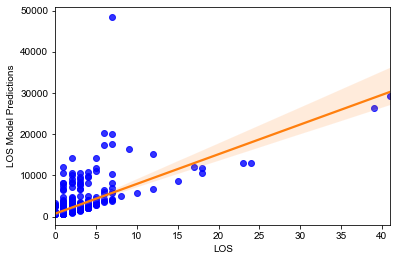

In [36]:
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(7, 7)})

sns.regplot(x=results["LOS"], y=results["TOTCHG"], fit_reg=False, ax=ax,scatter_kws={"color": "blue"});
sns.regplot(x=results["LOS"], y=results["LOS Model Predictions"], scatter=False, ax=ax);

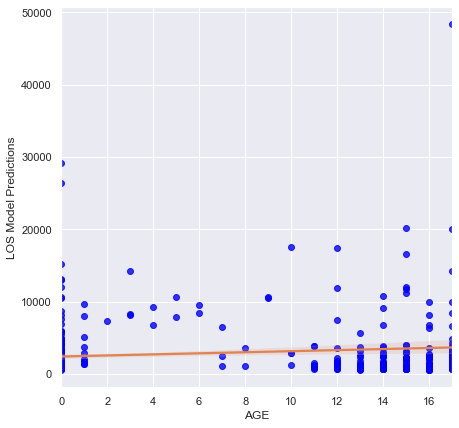

In [37]:
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(7, 7)})

sns.regplot(x=results["AGE"], y=results["TOTCHG"], fit_reg=False, ax=ax,scatter_kws={"color": "blue"});
sns.regplot(x=results["AGE"], y=results["LOS Model Predictions"], scatter=False, ax=ax);

Based on these results, this assumption has been violated.

#### Test for homoscedasticity
OLS gives equal weight to all observations in an attempt to minimize residuals and reduce the standard error. When homoscedasticity is violated, the high variations and disturbances will have more pull than other observations disrupting the equal weight assumption.

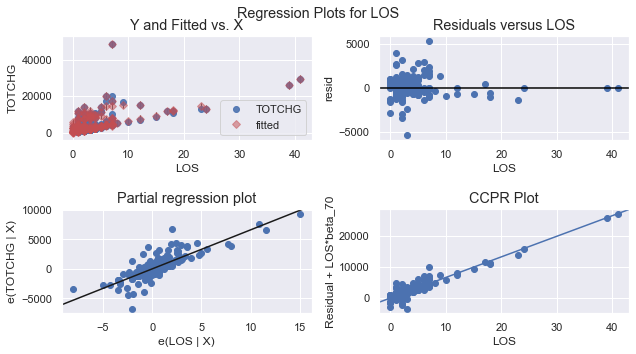

In [38]:
fig = plt.figure(figsize = (9,5))
fig = sm.graphics.plot_regress_exog(ols_res,'LOS', fig=fig);

In the case of LOS, this assumption has been violated. Each independent variable can be replaced in the function to understand the residuals.

## Model Accuracy

In [39]:
print("Model MSE:", smf_metrics.mse(df['TOTCHG'],ols_res.predict().round(2)))

Model MSE: 527740.3944534


Although, the model performed very well, many of the assumptions have been violated and must be corrected, prior to accepting this as a reliable model.